In [429]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [430]:
df = pd.read_csv('us_traffic_accidents.csv')

In [431]:
df.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Description,Street,City,County,State,...,Amenity,Traffic_Calming,Crossing,Give_Way,Stop,Junction,Railway,Roundabout,Traffic_Signal,Turning_Loop
0,A-2978105,2,2020-09-22 13:57:30,2020-09-22 23:57:06,0.121,Stationary traffic on FL-50 from FL-408/Challe...,E Colonial Dr,Orlando,Orange,FL,...,False,False,False,False,False,False,False,False,False,False
1,A-3647937,2,2020-04-18 15:22:47,2020-04-18 16:27:45,0.000,At SR-704/Okeechobee Blvd/Exit 70 - Accident. ...,I-95 N,West Palm Beach,Palm Beach,FL,...,False,False,False,False,False,False,False,False,False,False
2,A-3112304,2,2020-11-11 17:22:48,2020-11-11 18:58:53,0.495,Incident on US-8 near REDWING AVE Drive with c...,Redwing Ave,Shafer,Chisago,MN,...,False,False,False,False,False,False,False,False,False,False
3,A-3821734,2,2019-10-27 18:30:00,2019-10-27 21:47:39,0.000,At Nordhoff St/Exit 69 - Accident.,Nordhoff St,North Hills,Los Angeles,CA,...,False,False,False,False,False,False,False,False,False,False
4,A-3128913,2,2020-12-17 20:18:09,2020-12-17 21:54:11,0.012,Incident on MN-5 WB near MN-101 Drive with cau...,Powers Blvd,Chanhassen,Carver,MN,...,False,False,True,False,False,False,False,False,True,False


In [432]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Distance(mi)',
       'Description', 'Street', 'City', 'County', 'State', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Traffic_Calming', 'Crossing',
       'Give_Way', 'Stop', 'Junction', 'Railway', 'Roundabout',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

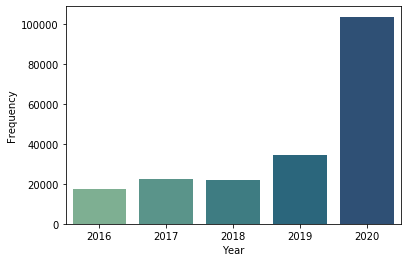

In [506]:
# Extract year
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
date_accidents_count = df["Start_Time"].dt.year.value_counts()
sns.barplot(date_accidents_count.index, date_accidents_count.values,palette =sns.color_palette("crest", n_colors=5))
plt.xlabel("Year")
plt.ylabel("Frequency")

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

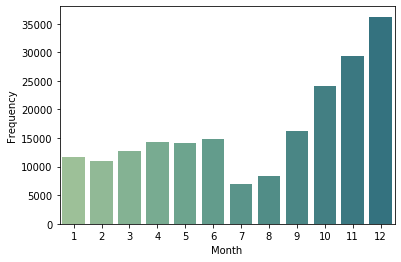

In [507]:
date_accidents_count = df["Start_Time"].dt.month.value_counts()
sns.barplot(date_accidents_count.index, date_accidents_count.values,palette =sns.color_palette("crest", n_colors=20))
plt.xlabel("Month")
plt.ylabel("Frequency")

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


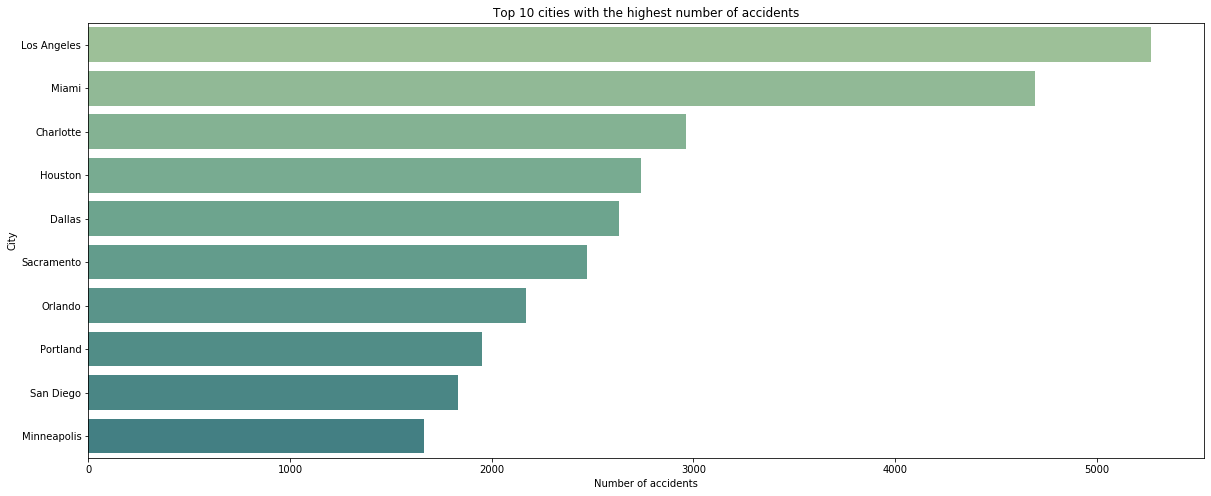

In [435]:
cities = df['City'].value_counts()
cities

plt.figure(figsize=(20, 8))
plt.title("Top 10 cities with the highest number of accidents")
sns.barplot(cities[:10].values, cities[:10].index, orient="h", palette =sns.color_palette("crest", n_colors=20))
plt.xlabel("Number of accidents")
plt.ylabel("City")
plt.show()

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


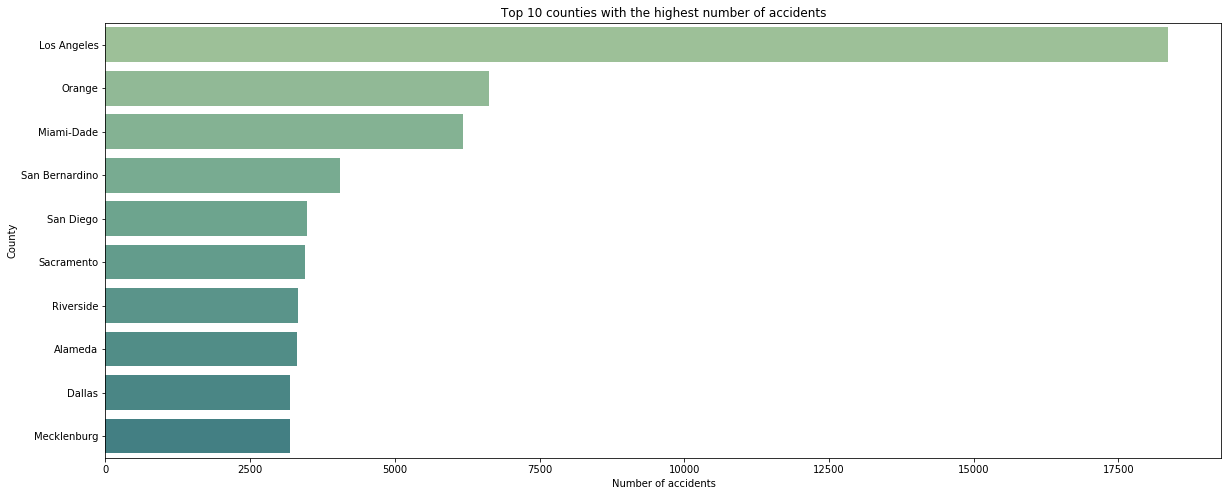

In [509]:
counties = df['County'].value_counts()


plt.figure(figsize=(20, 8))
plt.title("Top 10 counties with the highest number of accidents")
sns.barplot(counties[:10].values, counties[:10].index, orient="h", palette =sns.color_palette("crest", n_colors=20))
plt.xlabel("Number of accidents")
plt.ylabel("County")
plt.show()

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


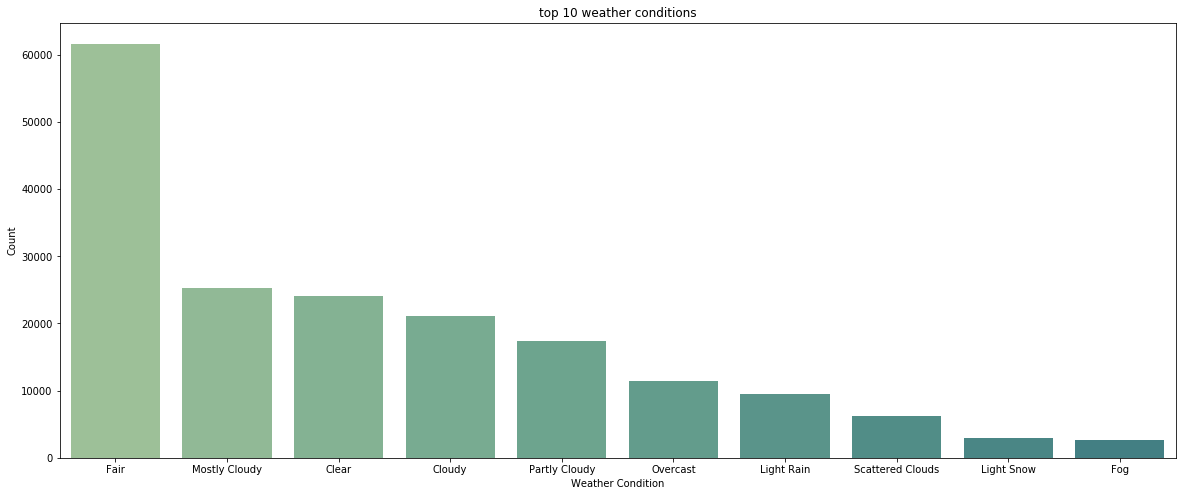

In [436]:
weather_counts = df["Weather_Condition"].value_counts()[:10]
plt.figure(figsize=(20, 8))
plt.title("top 10 weather conditions")
sns.barplot(weather_counts.index, weather_counts.values, palette =sns.color_palette("crest", n_colors=20))
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


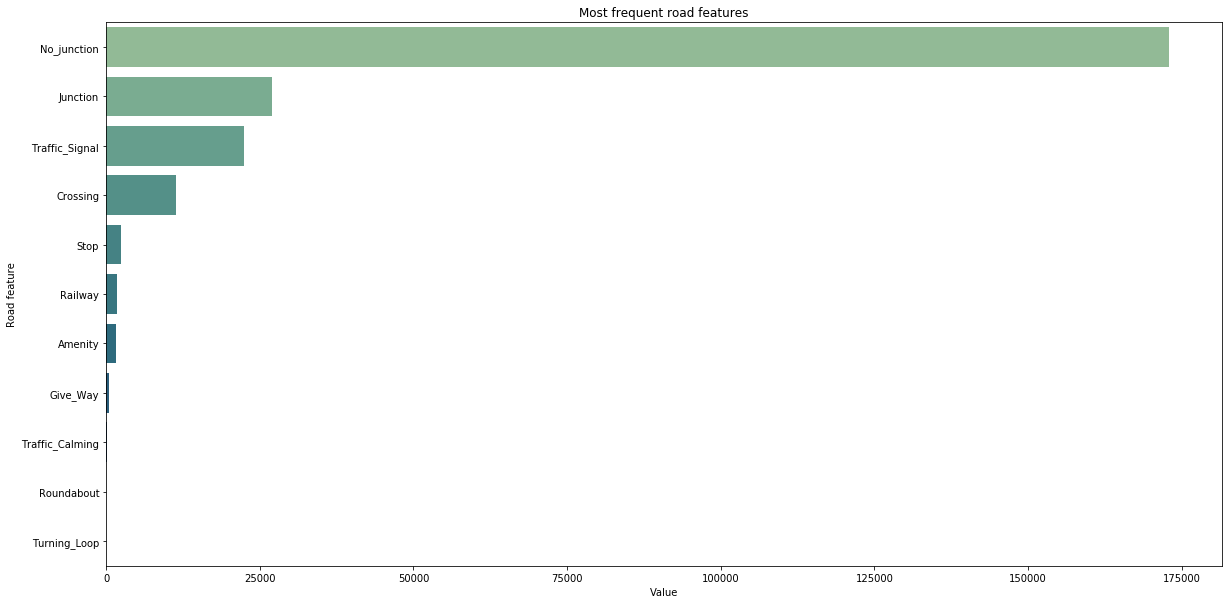

In [437]:
df['No_junction'] = np.where(df['Junction']== False, True, False)
road_type = df[['Amenity', 'Traffic_Calming', 'Crossing',
       'Give_Way', 'Stop', 'Junction', 'Railway', 'Roundabout',
       'Traffic_Signal', 'Turning_Loop', 'No_junction']].sum().sort_values(ascending=False)
plt.figure(figsize=(20, 10))
plt.title("Most frequent road features")
sns.barplot(road_type.values, road_type.index, orient="h",palette =sns.color_palette("crest", n_colors=10))
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


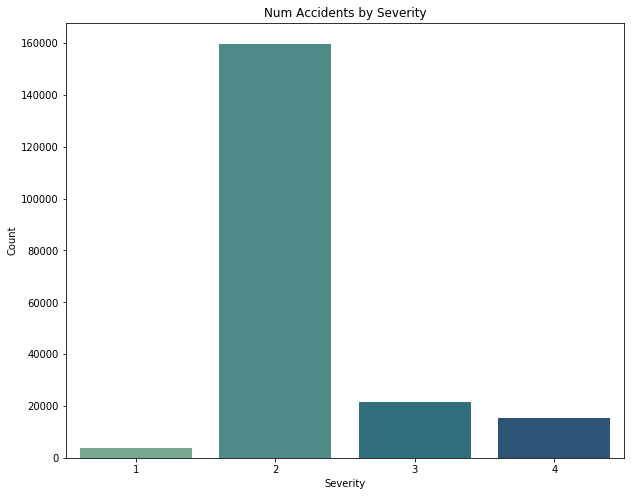

In [438]:
severity_counts = df["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Num Accidents by Severity")
sns.barplot(severity_counts.index, severity_counts.values, palette =sns.color_palette("crest", n_colors=4))
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

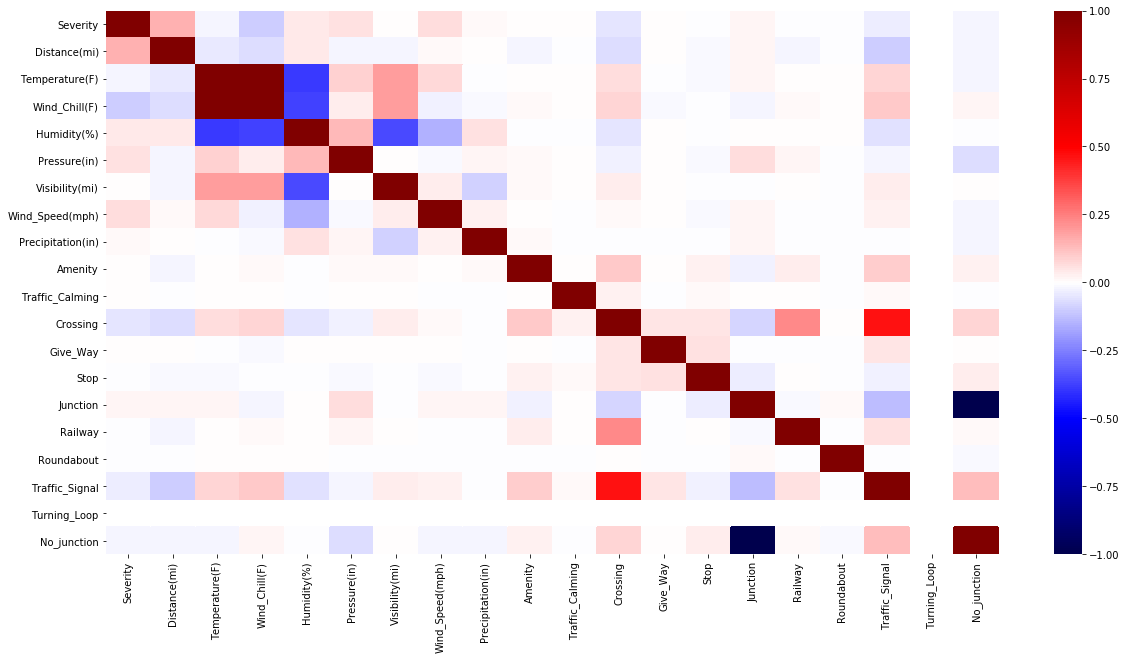

In [439]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")

plt.show()

In [440]:
df["Weather_Condition"].unique()

array(['Cloudy', 'Light Rain', 'Fair', 'Mostly Cloudy', 'Haze',
       'Overcast', 'Light Snow', 'Partly Cloudy', 'Snow', 'Clear', 'Rain',
       'Scattered Clouds', 'Thunder', 'Fog', 'Fair / Windy',
       'Thunderstorms and Rain', 'Heavy Rain', nan, 'Light Freezing Rain',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Light Snow / Windy',
       'Drizzle', 'T-Storm', 'Thunder in the Vicinity', 'Light Drizzle',
       'Light Rain / Windy', 'Blowing Snow', 'Smoke', 'Patches of Fog',
       'Light Thunderstorms and Rain', 'Shallow Fog',
       'Mostly Cloudy / Windy', 'Haze / Windy', 'Cloudy / Windy',
       'Thunderstorm', 'Light Rain with Thunder', 'Mist',
       'Showers in the Vicinity', 'Rain / Windy', 'Blowing Snow / Windy',
       'Rain Shower', 'N/A Precipitation', 'Heavy Thunderstorms and Rain',
       'Snow / Windy', 'Heavy Snow', 'Heavy T-Storm',
       'Heavy Rain / Windy', 'Light Freezing Drizzle', 'Rain Showers',
       'T-Storm / Windy', 'Ice Pellets', 'Light Rain Shower'

In [441]:
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower|N/A Precipitation", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls|Tornado", na=False), "Weather_Condition"] = "Wind"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df["Weather_Condition"].dropna(inplace=True)

In [510]:
df["Weather_Condition"].unique()

array(['Cloudy', 'Rain', 'Clear', 'Fog', 'Snow', 'Thunderstorm', nan,
       'Smoke', 'Wind', 'Hail', 'Sand'], dtype=object)

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


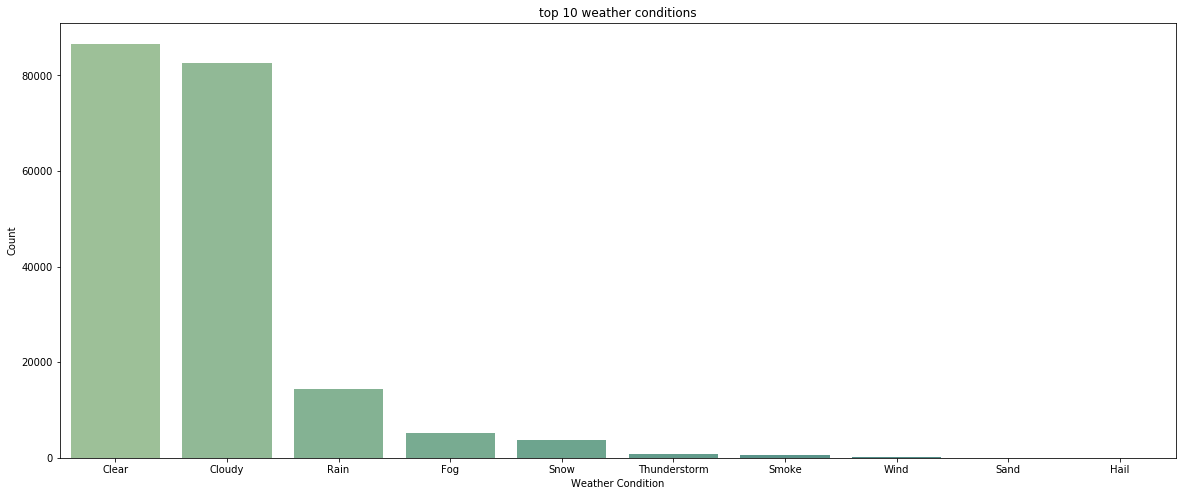

In [508]:
df["Weather_Condition"].unique()
weather_counts = df["Weather_Condition"].value_counts()[:10]
plt.figure(figsize=(20, 8))
plt.title("top 10 weather conditions")
sns.barplot(weather_counts.index, weather_counts.values, palette =sns.color_palette("crest", n_colors=20))
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()

## Preliminary models

Using quantitative weather variables only to predict severity of accident. Linear and logistic regression are used.

In [443]:
df1 = df[['Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
      'Wind_Speed(mph)', 'Precipitation(in)','Severity']]
df1 = df1.dropna()
df1

,Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Severity
0,83.0,54.0,29.96,10.0,20.0,0.00,2
1,74.0,91.0,30.02,7.0,7.0,0.39,2
2,29.0,92.0,28.98,10.0,5.0,0.00,2
3,63.0,72.0,28.97,10.0,3.0,0.00,2
4,19.0,78.0,29.13,6.0,7.0,0.00,2
...,...,...,...,...,...,...,...
199994,54.0,62.0,29.83,10.0,8.0,0.00,2
199995,87.0,53.0,29.08,10.0,16.0,0.00,2
199997,32.0,52.0,27.36,10.0,13.0,0.00,2
199998,38.0,89.0,29.35,8.0,0.0,0.00,2


In [444]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_model = LinearRegression()
data = df1.drop(columns = ["Severity"], axis = 1).values

target = df1["Severity"].values
linear_model.fit(X=data, y=target)

df1["predicted"] = linear_model.predict(data)

q1_mse = mean_squared_error(df1["Severity"].values,df1["predicted"].values) # float: MSE
q1_r2 = r2_score(df1["Severity"].values, df1["predicted"].values) # float: R^2 score


print("MSE:", q1_mse, "r^2:", q1_r2)
linear_model.coef_

MSE: 0.2692123009388344 r^2: 0.007956351873175893


array([ 0.00038482,  0.00147051, -0.02356395,  0.00011993,  0.00563574,
        0.00775582])

In [445]:
remove_n = 100000
drop_indices = np.random.choice(df1[df1['Severity']==2].index, remove_n, replace=False)
print(drop_indices)
df1 = df1.drop(drop_indices)

[ 76565 175325 139388 ... 131078 162836 104746]


To balance the data, randomly drop some of the accidents with severity of level 2. 

In [446]:
from sklearn.model_selection import train_test_split
data = df1.drop(columns=["Severity"])
target = df1["Severity"]
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=2022)

df1

,Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Severity,predicted
1,74.0,91.0,30.02,7.0,7.0,0.39,2,2.171394
2,29.0,92.0,28.98,10.0,5.0,0.00,2,2.166118
6,66.0,28.0,29.00,10.0,3.0,0.00,3,2.074501
7,14.0,89.0,29.03,1.0,18.0,0.00,3,2.226941
11,26.0,85.0,28.96,10.0,7.0,0.00,3,2.166412
...,...,...,...,...,...,...,...,...
199963,77.0,71.0,30.24,10.0,16.0,0.00,4,2.186011
199974,81.0,52.0,30.08,10.0,18.0,0.00,1,2.174652
199980,76.0,76.0,30.09,10.0,9.0,0.00,3,2.157063
199983,23.0,86.0,23.61,2.0,5.0,0.00,3,2.280565


/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy: 0.4024043208084093
[[ 395  354 1548    8]
 [ 156 1651 2567   27]
 [ 158 1225 4865   24]
 [ 111 1273 2839   18]]


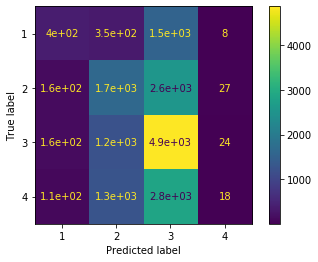

In [447]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

#perform logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X=train_data, y=train_target)

# get predictions and accuracy
predictions = logistic_model.predict(test_data)
acc_score = accuracy_score(test_target, predictions)

# Leave this line here to print the result
print("accuracy:", acc_score)
con_matrix = confusion_matrix(test_target, predictions)

print(con_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=[1,2,3,4])
disp.plot()
plt.show()

# Predictive models using sci-kit learn

first, encode the categorical variables.

In [494]:
df2 = df
df2 = df.replace([True, False], [1, 0])
df2["Month"] = df["Start_Time"].dt.month
df2["Year"] = df["Start_Time"].dt.year
df2.drop(columns = ["ID","Start_Time", "End_Time","City","State", "Description", "Street", "Turning_Loop","Wind_Direction"],inplace = True)
df2

,Severity,Distance(mi),County,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),...,Crossing,Give_Way,Stop,Junction,Railway,Roundabout,Traffic_Signal,No_junction,Month,Year
0,2,0.121,Orange,83.0,83.0,54.0,29.96,10.0,20.0,0.00,...,0,0,0,0,0,0,0,1,9,2020
1,2,0.000,Palm Beach,74.0,74.0,91.0,30.02,7.0,7.0,0.39,...,0,0,0,0,0,0,0,1,4,2020
2,2,0.495,Chisago,33.0,29.0,92.0,28.98,10.0,5.0,0.00,...,0,0,0,0,0,0,0,1,11,2020
3,2,0.000,Los Angeles,63.0,63.0,72.0,28.97,10.0,3.0,0.00,...,0,0,0,0,0,0,0,1,10,2019
4,2,0.012,Carver,27.0,19.0,78.0,29.13,6.0,7.0,0.00,...,1,0,0,0,0,0,1,1,12,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2,0.062,Clay,87.0,87.0,53.0,29.08,10.0,16.0,0.00,...,0,0,0,0,0,0,0,1,9,2019
199996,2,0.010,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,1,11,2020
199997,2,1.884,Malheur,39.0,32.0,52.0,27.36,10.0,13.0,0.00,...,0,0,0,0,0,0,0,1,10,2019
199998,2,2.000,Davidson,38.0,38.0,89.0,29.35,8.0,0.0,0.00,...,0,0,0,1,0,0,0,0,12,2020


In [495]:
features = ["Temperature(F)", "Humidity(%)","Wind_Chill(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
df2[features] = df2[features].fillna(df2[features].mean())
df2.dropna(inplace=True)
df2.isna().sum()

Severity             0
Distance(mi)         0
County               0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Traffic_Calming      0
Crossing             0
Give_Way             0
Stop                 0
Junction             0
Railway              0
Roundabout           0
Traffic_Signal       0
No_junction          0
Month                0
Year                 0
dtype: int64

In [496]:
severity_counts = df2["Severity"].value_counts()
min_n = severity_counts.min()
for i in range(1,5):
    remove_n = severity_counts[i] - min_n
    drop_indices = np.random.choice(df2[df2['Severity']==i].index, remove_n, replace=False)
    df2 = df2.drop(drop_indices)

In [497]:
import category_encoders as ce
binary_encoder = ce.binary.BinaryEncoder()
county = binary_encoder.fit_transform(df2["County"])
binary_encoder = ce.binary.BinaryEncoder()
weather = binary_encoder.fit_transform(df2["Weather_Condition"])
df2 = pd.concat([df2, county,weather], axis=1).drop(columns = ["County","Weather_Condition"], axis=1)
df2

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,County_4,County_5,County_6,County_7,County_8,County_9,Weather_Condition_0,Weather_Condition_1,Weather_Condition_2,Weather_Condition_3
5,4,3.962,42.1,39.200000,37.0,30.06,10.0,4.600000,0.008448,0,...,0,0,0,0,0,1,0,0,0,1
18,2,0.044,67.0,67.000000,81.0,29.77,10.0,3.000000,0.000000,0,...,0,0,0,0,1,0,0,0,0,1
22,1,0.000,49.0,44.000000,93.0,29.73,6.0,14.000000,0.000000,0,...,0,0,0,0,1,1,0,0,0,1
23,2,0.822,66.0,66.000000,24.0,29.51,10.0,3.000000,0.000000,0,...,0,0,0,1,0,0,0,0,1,0
32,3,2.472,39.0,55.082355,96.0,30.43,3.0,7.621646,0.008448,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199932,2,2.312,78.0,78.000000,74.0,29.81,10.0,8.000000,0.000000,0,...,0,0,1,1,0,1,0,0,0,1
199933,1,0.000,95.0,95.000000,49.0,30.01,10.0,6.000000,0.000000,0,...,0,1,0,1,0,0,0,0,0,1
199950,2,0.421,63.0,63.000000,100.0,28.49,7.0,20.000000,0.000000,0,...,1,1,1,1,1,1,0,1,0,0
199967,2,1.818,56.3,55.082355,92.0,30.13,10.0,7.621646,0.008448,0,...,1,1,1,0,1,1,0,0,1,0


In [511]:
data = df2.drop(columns=["Severity"])
target = df2["Severity"]
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=2022)

In [512]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params_to_try = {'n_neighbors': range(1, 20)}
knn_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_to_try)
knn_search.fit(train_data, train_target)
n = knn_search.best_params_['n_neighbors']
pred = knn_search.predict(test_data) 

print ("Accuracy : ", accuracy_score(test_target, pred))
print("Optimal n_neighors:", n)


Accuracy :  0.47575668527769616
Optimal n_neighors: 19


[[2224  100  147   70]
 [ 662 1007  467  413]
 [ 778  342  874  571]
 [ 595  509  698  752]]


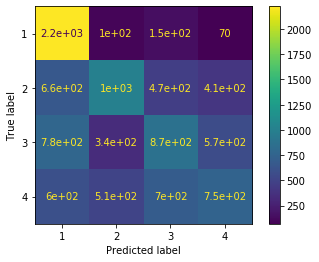

In [513]:
con_matrix = confusion_matrix(test_target, pred)
print(con_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=[1,2,3,4])
disp.plot()
plt.show()

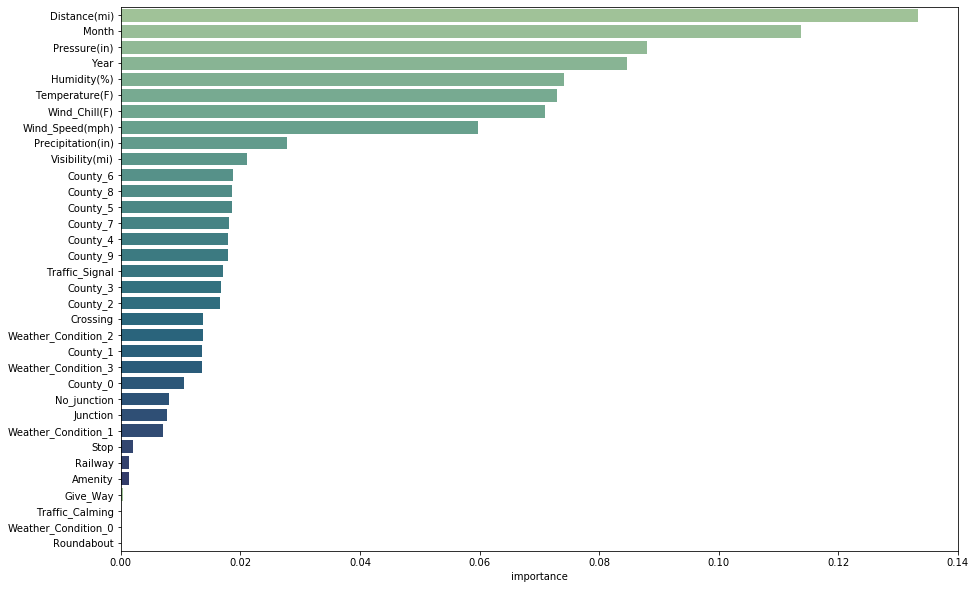

In [518]:
importances = pd.DataFrame(np.zeros((train_data.shape[1], 1)), columns=["importance"], index=train_data.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances, palette =sns.color_palette("crest", n_colors=30))
plt.show()

/Users/psuedoche/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy: 0.4640023508668822
[[1930   91  249  271]
 [ 545 1241  468  295]
 [ 783  471  837  474]
 [ 618  608  599  729]]


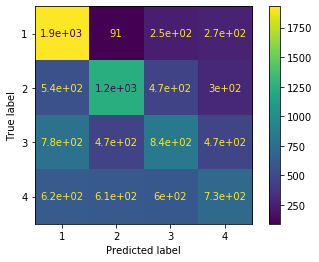

In [501]:
logistic_model = LogisticRegression()
logistic_model.fit(X=train_data, y=train_target)

# get predictions and accuracy
predictions = logistic_model.predict(test_data)
acc_score = accuracy_score(test_target, predictions)

print("accuracy:", acc_score)
con_matrix = confusion_matrix(test_target, predictions)

print(con_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=[1,2,3,4])
disp.plot()
plt.show()

In [502]:
from sklearn.metrics import classification_report
print(classification_report(test_target, predictions))

              precision    recall  f1-score   support

           1       0.50      0.76      0.60      2541
           2       0.51      0.49      0.50      2549
           3       0.39      0.33      0.35      2565
           4       0.41      0.29      0.34      2554

    accuracy                           0.46     10209
   macro avg       0.45      0.46      0.45     10209
weighted avg       0.45      0.46      0.45     10209



In [503]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, random_state=2022)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(train_data, train_target)

print("Best parameters:")
print(grid.best_params_)
print("Train score:", grid.score(train_data, train_target))
print("Validation score:", grid.score(test_data, test_target))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


Best parameters:
{'max_depth': 30, 'n_estimators': 500}
Train score: 0.9997714285714285
Validation score: 0.6454109119404448


              precision    recall  f1-score   support

           1       0.74      0.93      0.83      2541
           2       0.72      0.58      0.64      2549
           3       0.53      0.50      0.51      2565
           4       0.57      0.57      0.57      2554

    accuracy                           0.65     10209
   macro avg       0.64      0.65      0.64     10209
weighted avg       0.64      0.65      0.64     10209

[[1930   91  249  271]
 [ 545 1241  468  295]
 [ 783  471  837  474]
 [ 618  608  599  729]]


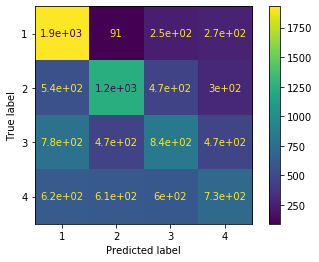

In [504]:
rfc.fit(train_data, train_target)
pred = rfc.predict(test_data)
print(classification_report(test_target, pred))
con_matrix = confusion_matrix(test_target, predictions)

print(con_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=[1,2,3,4])
disp.plot()
plt.show()

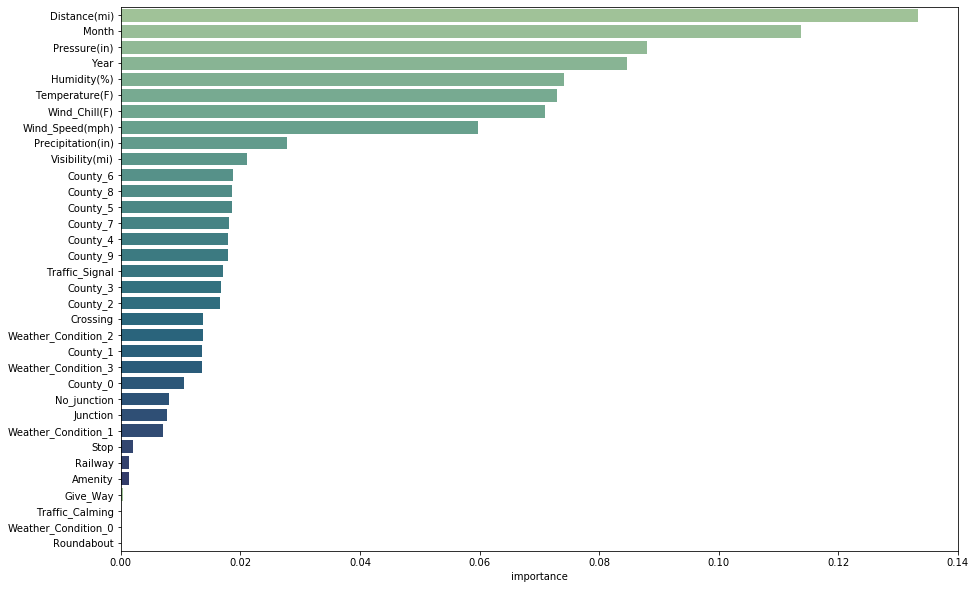

In [517]:
importances = pd.DataFrame(np.zeros((train_data.shape[1], 1)), columns=["importance"], index=train_data.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances, palette =sns.color_palette("crest", n_colors=30))
plt.show()